In [12]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

from confustion_matrix_plot import load_images_from_folder, load_label_mapping
from lowAltitude_classification import confustion_matrix_plot


In [13]:
annotation_folder = '/home/kamyar/Documents/Train-val_Annotated_masks'
prediction_folder = '/home/kamyar/Documents/Train-val_Annotated_Predictions/41_background_best'
label_to_id_path = 'label_to_id.txt'

In [14]:
annotations = load_images_from_folder(annotation_folder)
predictions = load_images_from_folder(prediction_folder)
label_mapping = load_label_mapping(label_to_id_path)

all_annotations = np.concatenate([annotations[key].flatten() for key in annotations.keys()])
all_predictions = np.concatenate([predictions[key].flatten() for key in predictions.keys()])

unique_labels = np.unique(np.concatenate([all_annotations, all_predictions]))
filtered_label_mapping = {i: label_mapping[i] for i in unique_labels if i in label_mapping}

cm = confusion_matrix(all_annotations, all_predictions, labels=list(filtered_label_mapping.keys()), normalize='true')
class_labels = [filtered_label_mapping[i] for i in filtered_label_mapping.keys()]

# correct_pixels = np.diag(cm)
# total_pixels = np.sum(cm, axis=1)
#
# pixel_accuracy = np.mean(correct_pixels / total_pixels)

In [15]:
all_annotations, all_predictions

(array([14, 14, 14, ..., 10, 10, 10], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

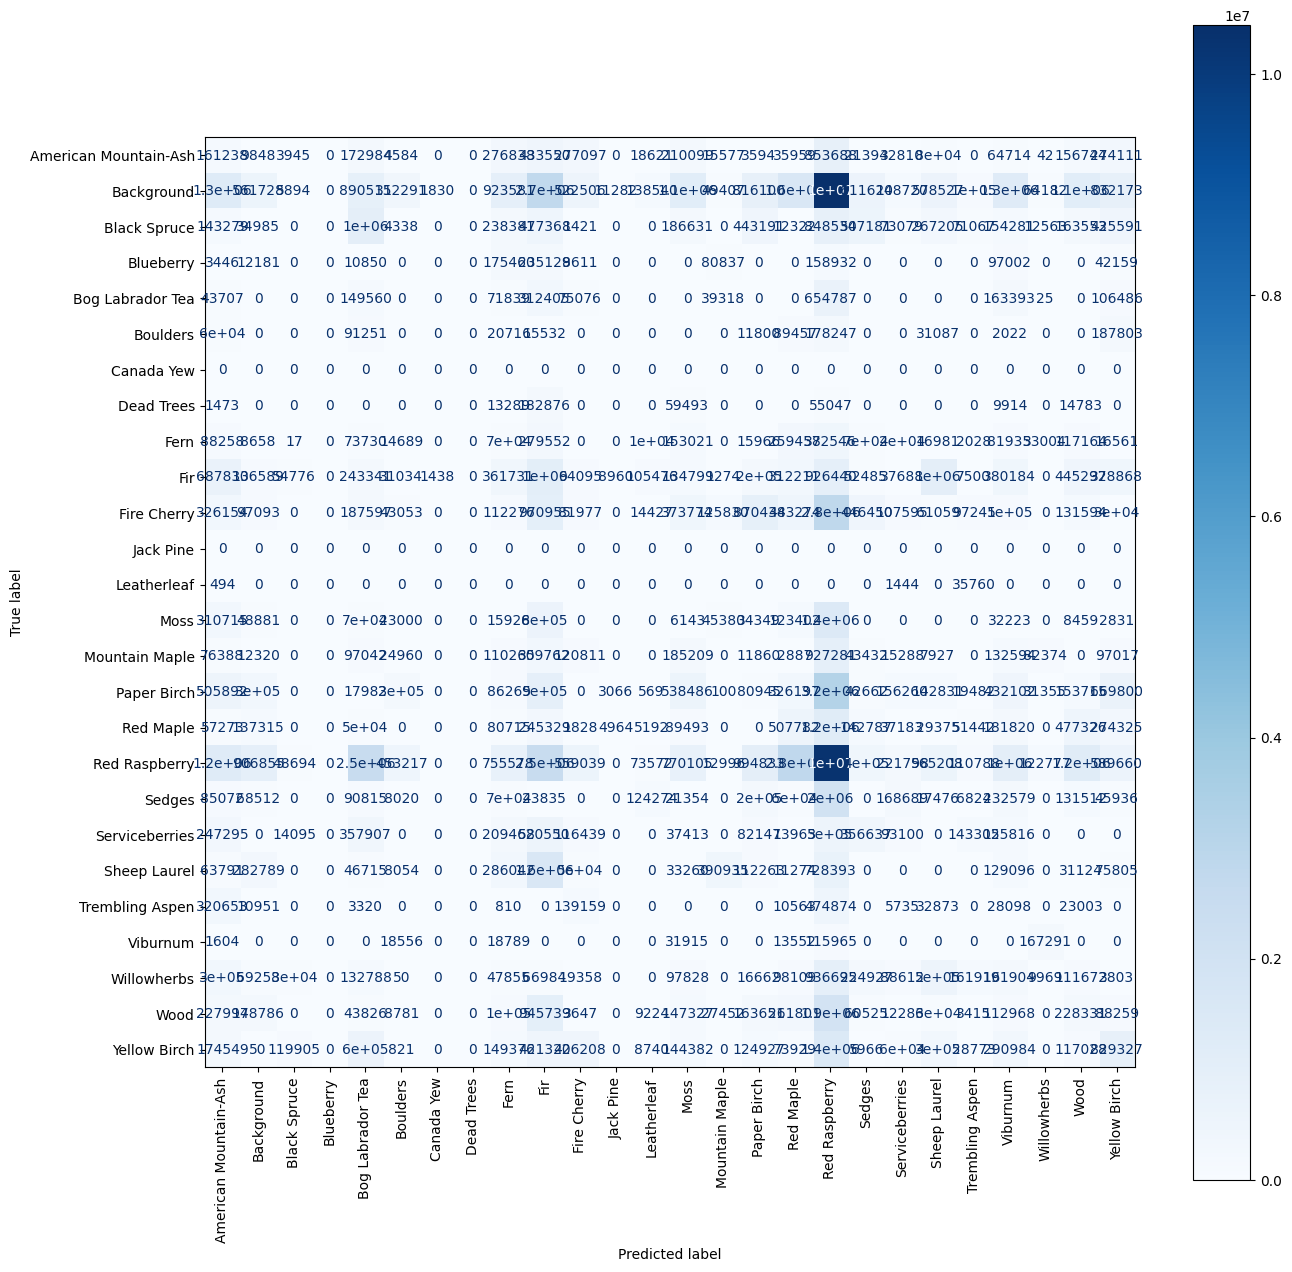

In [25]:
disp = ConfusionMatrixDisplay.from_predictions(all_annotations, all_predictions, cmap="Blues", display_labels=class_labels)
fig = disp.ax_.get_figure()
ax = disp.ax_
fig.set_figwidth(15)
fig.set_figheight(15)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(),rotation=90)
